<a href="https://colab.research.google.com/github/skoleti123/Python_AI/blob/main/AIET_GMM_Latent_Variable_Models_29_12_2024_Single.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1> <b> AIET Tutorial on GMM and Latent variable models </b> </h1> </center>

<dt> <h4> <b> Introduction </b> </dt> </h4>

Welcome to the tutorial on GMM and latent variable models. This tutorial is broadly classified into two parts. The first part of the tutorial focuses on coding the Expectation and Maximization (EM) algorithm to fit the GMM for synthetic data in low dimensional space (2D space). The second part aims to build the Automatic Speaker Verification (ASV) system using GMM models.





<dt> <h4> <b> 1). Gaussian distribution - Single variable distribution </b>  </h4> </dt>

<dt> <h4> <center> $ p(x) \sim \mathcal{N}(\mu,\sigma^{2}) = \frac{1}{\sigma\sqrt{2\pi}}  e^{-\frac{1}{2} \frac{(x-\mu)^{2}}{\sigma^{2}}} $ </center>  </h4> </dd>

<dd> <h4> - Estimate the parameters of model from the observed data   </h4> </dd>

<dt> <h4> <center> $ \mu = \frac{1}{N}\sum_{i=1}^{N}x_{i} $ </center>  </h4> </dd>
<dt> <h4> <center> $ \sigma^{2} = \frac{1}{N}\sum_{i=1}^{N} (x_{i} - \mu)^{2} $ </center>  </h4> </dd>

<dt> <h4> <b> 2). Gaussian distribution - Multi variable distribution </b>  </h4> </dt>

<dt> <h4> <center> $ p(\textbf{x}) \sim \mathcal{N}(\boldsymbol\mu,\boldsymbol\Sigma) = \frac{1}{(2\pi)^{\frac{D}{2}} |\boldsymbol\Sigma|^{\frac{1}{2}}}  e^{-\frac{1}{2} (\textbf{x}-\boldsymbol\mu)^{T}\boldsymbol\Sigma^{-1}(\textbf{x}-\boldsymbol\mu)} $ </center>  </h4> </dd>



<dd> <h4> - Estimate the parameters of model from the observed data   </h4> </dd>

<dt> <h4> <center> $ \boldsymbol\mu = \frac{1}{N}\sum_{i=1}^{N}x_{i} $ </center>  </h4> </dd>
<dt> <h4> <center> $ \boldsymbol\Sigma = \frac{1}{N}\sum_{i=1}^{N} (\textbf{x}_{i} - \boldsymbol\mu) (\textbf{x}_{i} - \boldsymbol\mu)^{T} $ </center>  </h4> </dd>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mu = 10.
std = 0.2

samples = np.random.normal(mu, std, 10000)

In [ ]:
samples

array([ 8.24119308, 10.84905319, 12.48340605, 10.90492127, 10.39784975,
       10.87006224,  8.5993985 , 11.72806736,  8.84143601, 10.81515138,
        9.4562965 , 11.13614862, 11.07021083, 10.58739219,  9.96273554,
        8.42569312,  8.91378311,  9.54195395,  8.47282555, 10.73532019,
        9.66386849, 10.85161374, 10.83770543, 11.40224904, 12.02126032,
       10.79369021,  8.40972475, 10.66700018, 10.08903356, 10.8559422 ,
       10.40958816,  9.52613188,  9.33658229, 10.17740779,  9.85314328,
        8.97140561,  9.8346839 ,  9.72249686, 11.34342034,  9.48270555,
       10.29547811, 10.94507413,  9.95115939,  9.782795  , 10.35753815,
        9.59702874, 10.13323216,  8.60219588,  9.66637029,  8.87212503,
       10.84986207,  9.56638436, 10.38213992,  9.90384849,  9.82301086,
       10.52162493,  9.23940915,  8.89980398, 11.03631591, 10.90038234,
       12.01215933,  8.36562777,  9.38799626,  8.21415477,  9.99155692,
        9.28419761, 10.40698059,  8.52568353, 10.19546187,  9.28

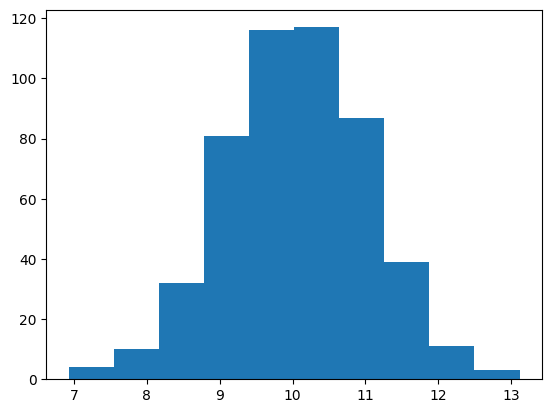

In [ ]:
plt.hist(samples)
plt.show()

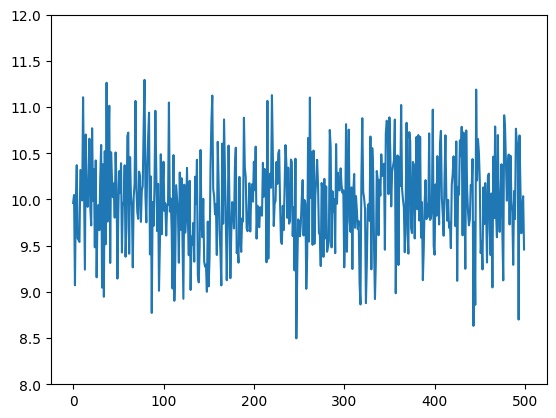

In [ ]:
plt.plot(samples)
plt.ylim([8, 12])
plt.show()

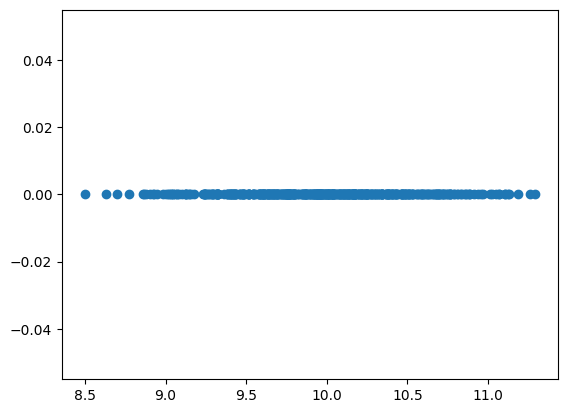

In [ ]:
plt.scatter(samples, np.zeros(len(samples)))
plt.show()

In [ ]:
sum = 0.
for i in range(len(samples)):
  sum += samples[i]

mean = sum/len(samples)
print(mean)

10.001259815712336


In [ ]:
sum = 0.
for i in range(len(samples)):
  sum += (samples[i]-mean)**2

variance = sum/len(samples)
print((variance)**0.5)

0.20068954559975402


In [ ]:
#Kids
m_k = 25
s_k = 4

data_k = np.random.normal(m_k, s_k, 1000)

# Adults
m_a = 50
s_a = 5
data_a = np.random.normal(m_a, s_a, 1000)

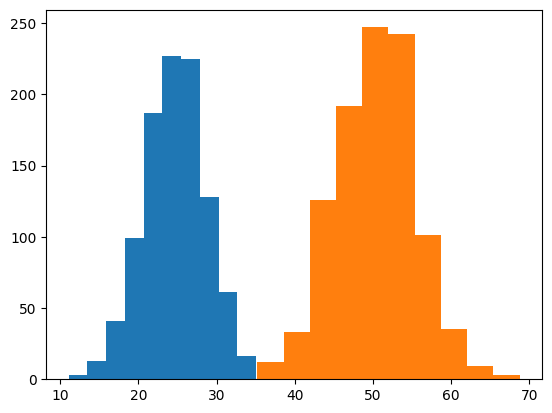

In [ ]:
plt.hist(data_k)
plt.hist(data_a)
plt.show()

In [ ]:
# Mean Estimates

sum = 0.
for i in range(len(data_k)):
  sum += data_k[i]

mean_k = sum/len(data_k)
print('Mean of Kids:', mean_k)

sum = 0.
for i in range(len(data_a)):
  sum += data_a[i]

mean_a = sum/len(data_a)
print('Mean of Adults:',mean_a)

Mean of Kids: 25.028794570289023
Mean of Adults: 49.84337274100731


In [ ]:
# Variance Estimates

sum = 0.
for i in range(len(data_k)):
  sum += (data_k[i]-mean_k)**2

variance_k = sum/len(data_k)
print('SD of Kids:',(variance_k)**0.5)

sum = 0.
for i in range(len(data_a)):
  sum += (data_a[i]-mean_a)**2

variance_a = sum/len(data_a)
print('SD of Adults:',(variance_a)**0.5)

SD of Kids: 3.940530826624678
SD of Adults: 5.054134380688955
